

# **Inpainting to Restore Damaged Photos**

**In this lesson we'll take a damaged old photo, and restore it using the inpaint() function**


In [1]:

# download our images
import os
import wget
from zipfile import ZipFile


def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

URL = "https://github.com/Tuchsanai/DL-FOR-COMPUTER-VISION-2565_1/raw/main/week2/code/images.zip"

if not os.path.exists("images.zip"):
    wget.download(URL,bar=bar_custom)

if not os.path.exists("images"):
    with ZipFile('images.zip', 'r') as zipObj:
        # Extract all the contents of zip file in current directory
        zipObj.extractall()

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


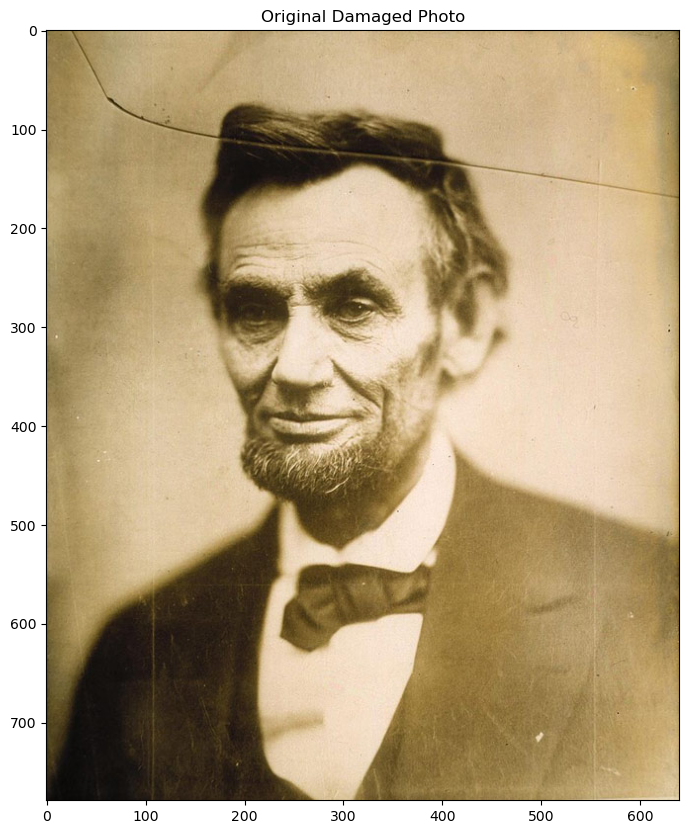

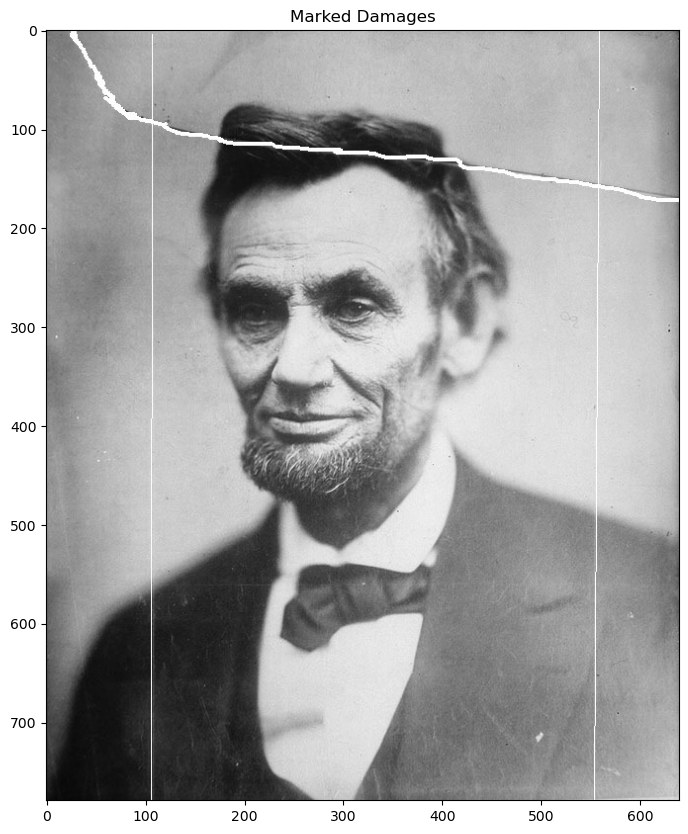

In [3]:
# Load our damaged photo
image = cv2.imread('images/abraham.jpg')
imshow('Original Damaged Photo', image)

# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('images/mask.jpg', 0)
imshow('Marked Damages', marked_damages)


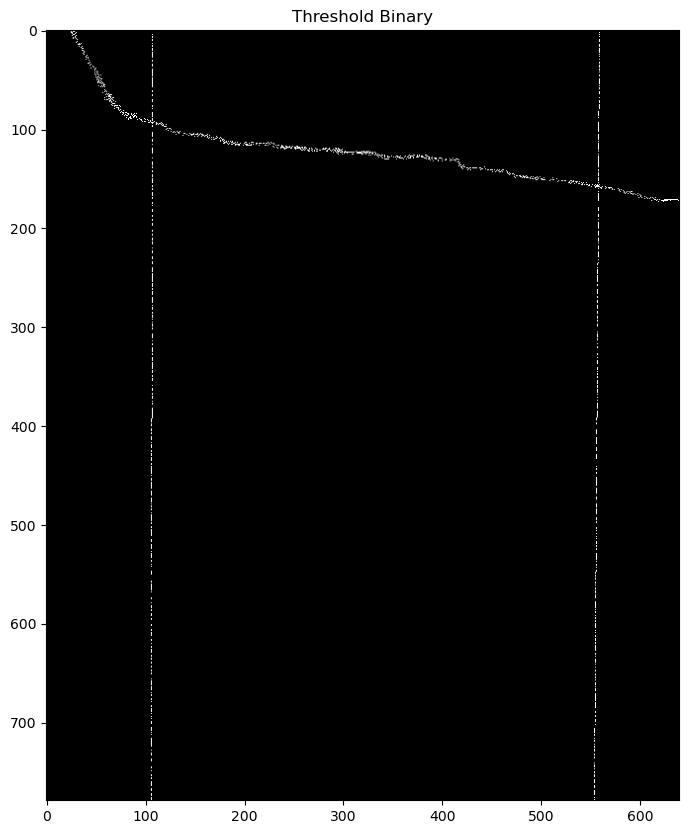

In [4]:

# Let's make a mask out of our marked image be changing all colors 
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

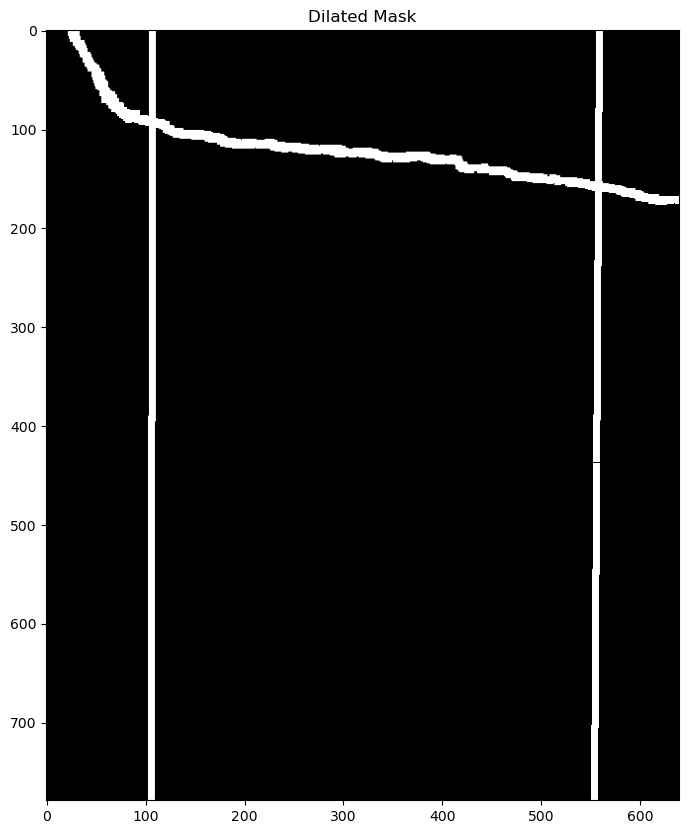

True

In [5]:

# Let's dilate (make thicker) our the marks w made
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
imshow('Dilated Mask', mask)
cv2.imwrite("images/abraham_mask.png", mask)

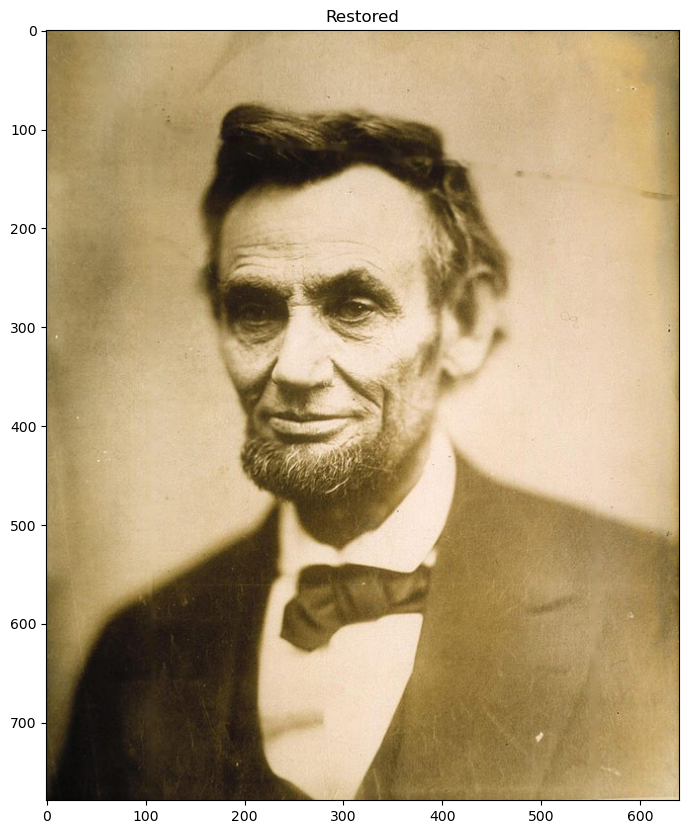

In [6]:
restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

imshow('Restored', restored)